

# Getting data and running intial analysis

Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('/content/sample_data/h.csv')
#csv file was renamed for ease of use
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


Removing unnessary data

In [3]:
data = data.drop('ocean_proximity', axis=1)
data = data.drop('longitude', axis=1)
data = data.drop('latitude', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  int64  
 1   total_rooms         20640 non-null  int64  
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  int64  
 4   households          20640 non-null  int64  
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.1 MB


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [5]:
#data.corr()

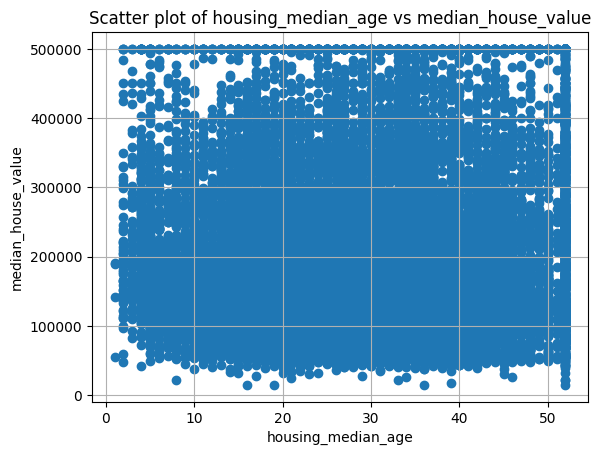

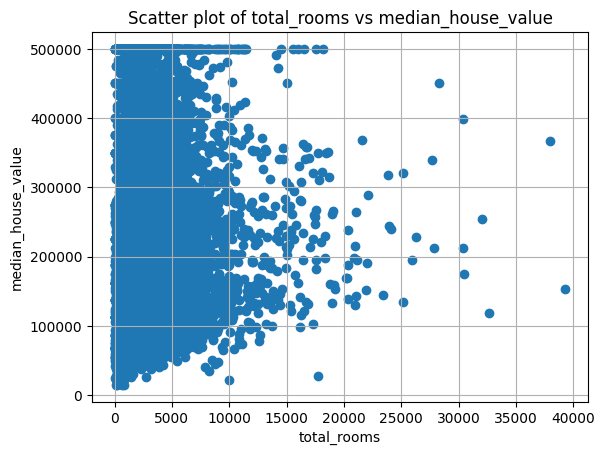

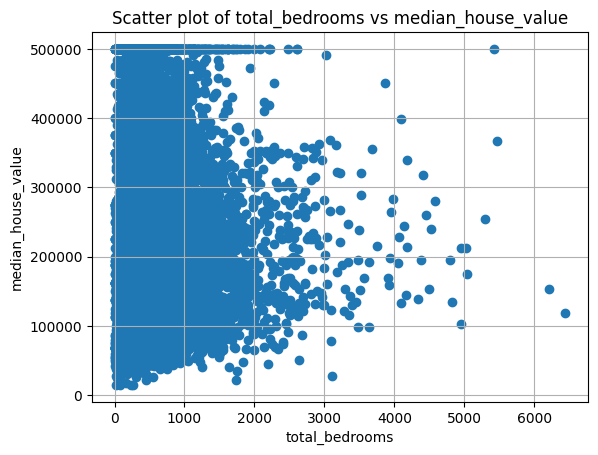

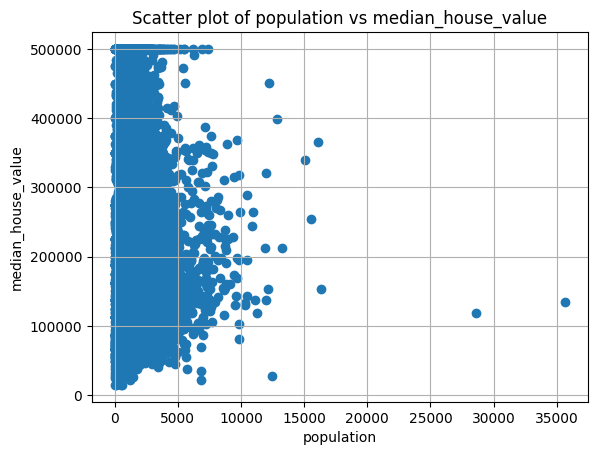

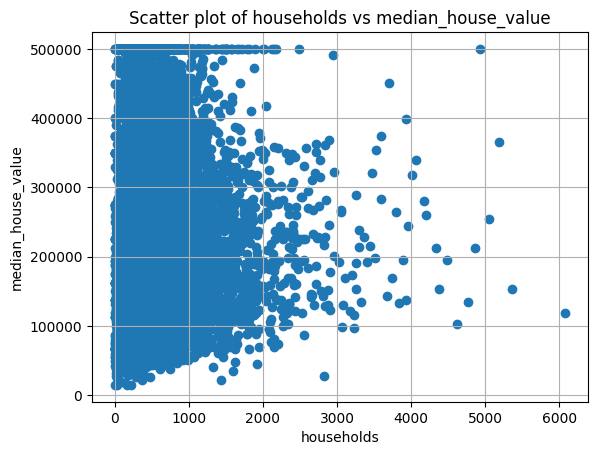

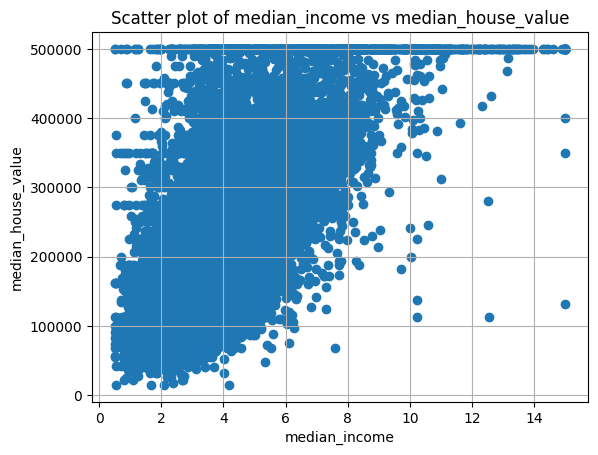

In [6]:
compare_column = 'median_house_value'

# Loop through each column (except Column named median_house_value) and create scatter plots
for column in data.columns:
    if column != compare_column:
        #plt.figure(figsize=(8, 6))
        plt.tight_layout()
        plt.scatter(data[column], data[compare_column])
        plt.xlabel(column)
        plt.ylabel(compare_column)
        plt.title(f'Scatter plot of {column} vs {compare_column}')
        plt.grid(True)
        plt.show()

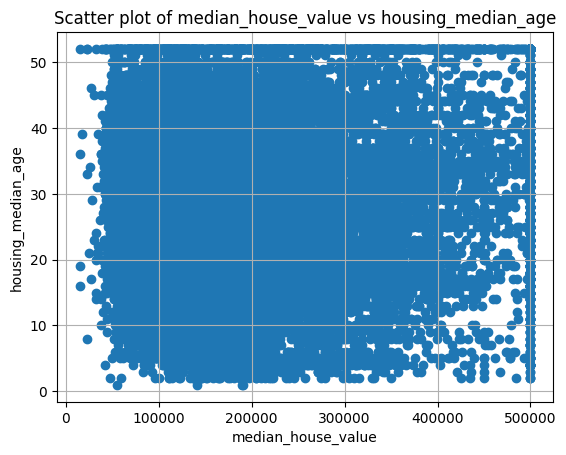

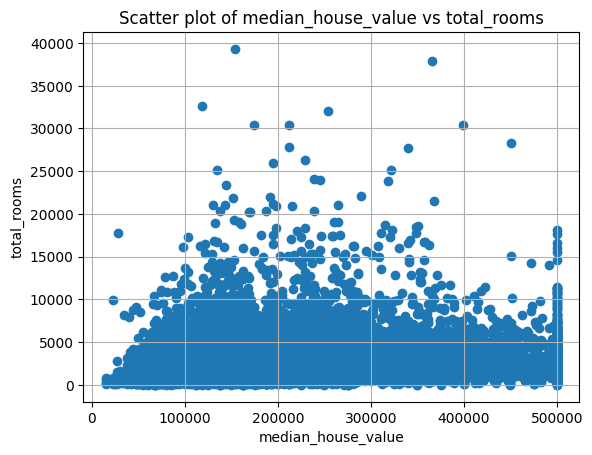

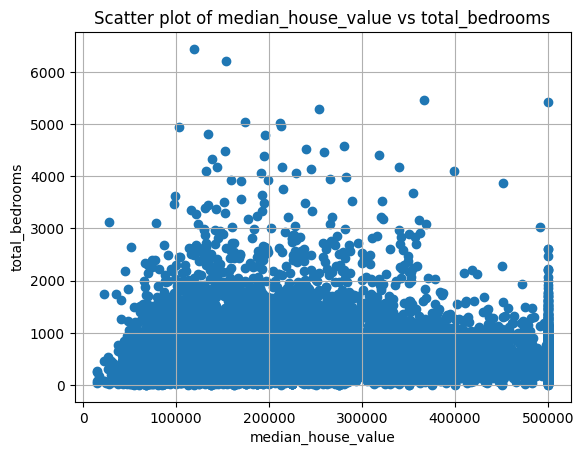

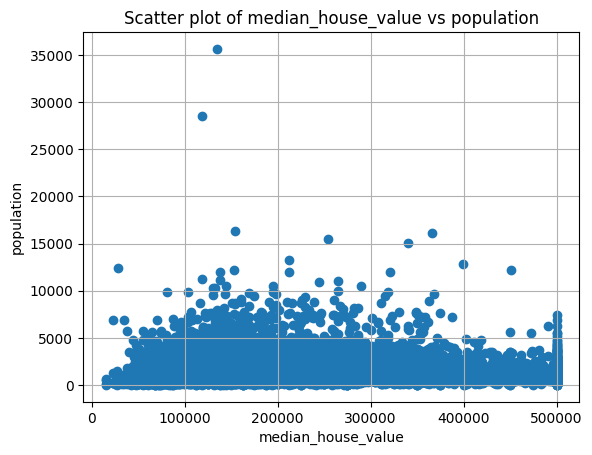

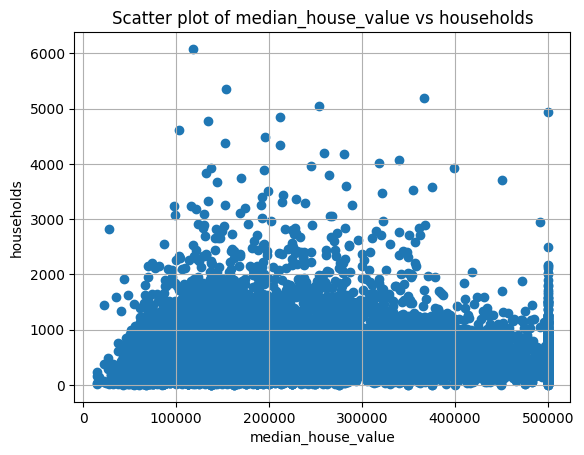

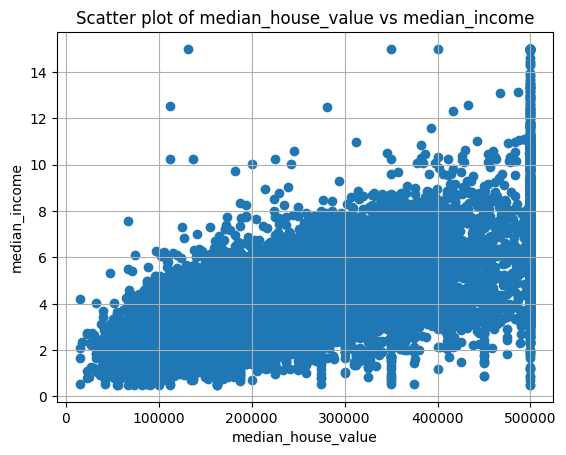

In [7]:
compare_column = 'median_house_value'

# Loop through each column (except Column named median_house_value) and create scatter plots
for column in data.columns:
    if column != compare_column:
        #plt.figure(figsize=(8, 6))
        plt.tight_layout()
        plt.scatter(data[compare_column], data[column])
        plt.xlabel(compare_column)
        plt.ylabel(column)
        plt.title(f'Scatter plot of {compare_column} vs {column}')
        plt.grid(True)
        plt.show()

In [8]:
y_data = data['median_house_value']
X_data = data.drop('median_house_value', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (16512, 6)
Testing  Shape:  (4128, 6)
